In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [4]:
# Import load_data function from scripts
from load_data import load_data

# read the dataset 

data = load_data('../data/MachineLearningRating_v3.zip', filename='MachineLearningRating_v3.txt')

In [5]:
# Explore the first few rows
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [6]:
# Find the number of rows and columns
data.shape

(1000098, 52)

## Data Cleaning
Handle missing or incomplete data: Since the dataset spans several categories, some fields may have missing values.

In [7]:
# Import the Class to data processing

from data_processing import DataProcessing
# Create instance of the class
data_processing = DataProcessing(data)

# Summary of Missing data
missing_summary = data_processing.missing_data_summary()

# Display results
missing_summary

,Missing Count,Percentage (%)
NumberOfVehiclesInFleet,1000098,100.000000
CrossBorder,999400,99.930207
CustomValueEstimate,779642,77.956560
WrittenOff,641901,64.183810
Converted,641901,64.183810
Rebuilt,641901,64.183810
NewVehicle,153295,15.327998
Bank,145961,14.594670
AccountType,40232,4.022806
Gender,9536,0.953507


# Drop Columns with High Missing Data:

Columns with high missing values offer little analytical value.
Dropped Columns

NumberOfVehiclesInFleet (100% missing)
CrossBorder (~99.93%)
CustomValueEstimate (~77.96%)
Converted, Rebuilt, WrittenOff (~64.18%)

In [8]:
cols_to_drop = ['NumberOfVehiclesInFleet', 
                'CrossBorder', 
                'CustomValueEstimate', 
                'Converted', 'Rebuilt', 
                'WrittenOff']

# Drop these columns
data = data_processing.handle_missing_data('high', cols_to_drop)

## Impute Moderate Missing Data:

Imputation preserves useful information, using the mode for categorical and median for numerical columns.
Imputed Columns:

NewVehicle (~15.33%)
Bank (~14.59%)
AccountType (~4.02%)

In [9]:

# Impute or drop columns with moderate missing data
missing_cols = ['NewVehicle', 'Bank', 'AccountType']
data = data_processing.handle_missing_data('moderate', missing_cols)

# Overall Decision Summary:

High missing data: Dropped.

Moderate missing data: Imputed with mode (categorical) or median (numerical).

Low missing data: Imputed to avoid unnecessary data loss.

In [10]:
# Check duplicates
data.duplicated().sum()

np.int64(74)

## Summarize Key Statistics

### Descriptive statistics:
In the descriptive statistics calculate and examine the variability for numerical features such as TotalPremium, TotalClaim, etc.

In [ ]:
# Statistic summary of numerical features
num_cols = ['SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
display(data[num_cols].describe())

Insights:

Skewness: The data for all columns is highly skewed with a long tail of high values (especially for SumInsured, CalculatedPremiumPerTerm, TotalPremium, and TotalClaims). The mean values are much higher than the medians, which implies a small number of high-value policies and premiums influence the average.

Outliers: Significant outliers exist, particularly in TotalPremium and TotalClaims, where negative values could indicate refunds or adjustments, while high values drive the average up.

Majority of Policies: The majority of policies have small insured sums, low premiums, and zero claims, as indicated by the 50th and 75th percentiles being much lower than the maximum values.

These insights suggest that a large proportion of the policies are low in terms of both insured amounts and premiums, while a small number of high-value policies dominate the high-end of the distributions.

Data Structure Review:

It's important to review the data types to ensure that:

Numerical Columns are in the correct numeric format (int, float).
Categorical Variables (e.g., Gender, PolicyType) are encoded as categories or objects.
Dates are formatted as datetime for proper time-series analysis.

In [11]:
# Check the Data types of each column

data_types = data.dtypes

data_types.reset_index(name='data type')

,index,data type
0,UnderwrittenCoverID,int64
1,PolicyID,int64
2,TransactionMonth,object
3,IsVATRegistered,bool
4,Citizenship,object
5,LegalType,object
6,Title,object
7,Language,object
8,Bank,object
9,AccountType,object


### Since the VehicleIntroDate column is of type object, it should be transformed into a proper date format (datetime). This transformation is essential for performing time-based analysis or working with date-related features effectivel

In [12]:
# Converts the VehicleIntroDate column from object to datetime format.

data['VehicleIntroDate'] = pd.to_datetime(data['VehicleIntroDate'], format='%d/%m/%Y', errors='coerce')  # Convert with error handling

Univariate Analysis:

Distribution of Variables: Plot histograms for numerical columns and bar charts for categorical columns to understand distributions..

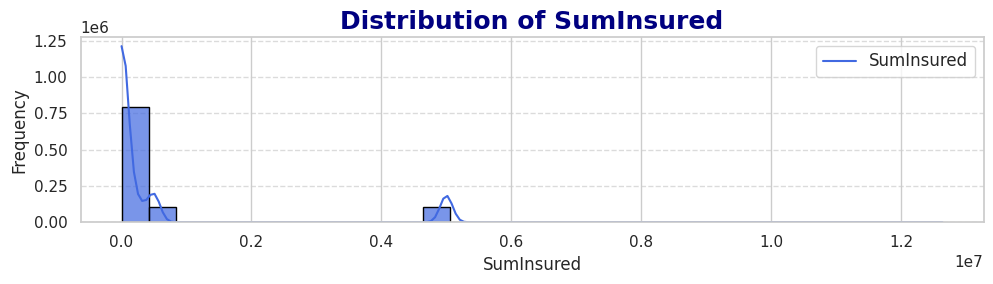

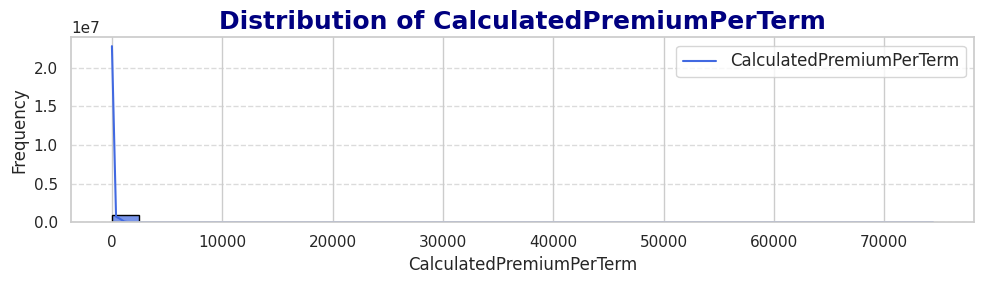

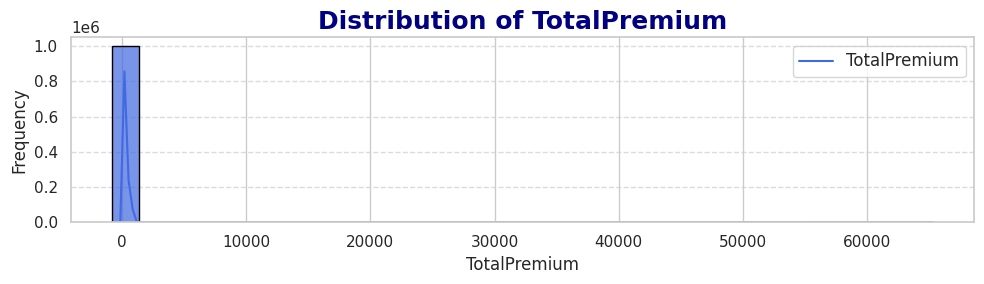

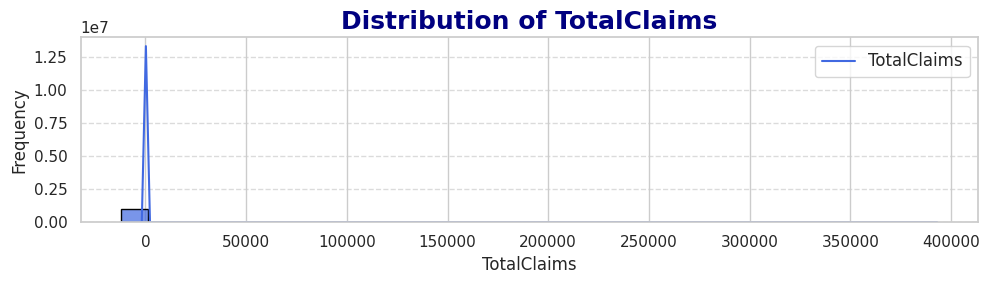

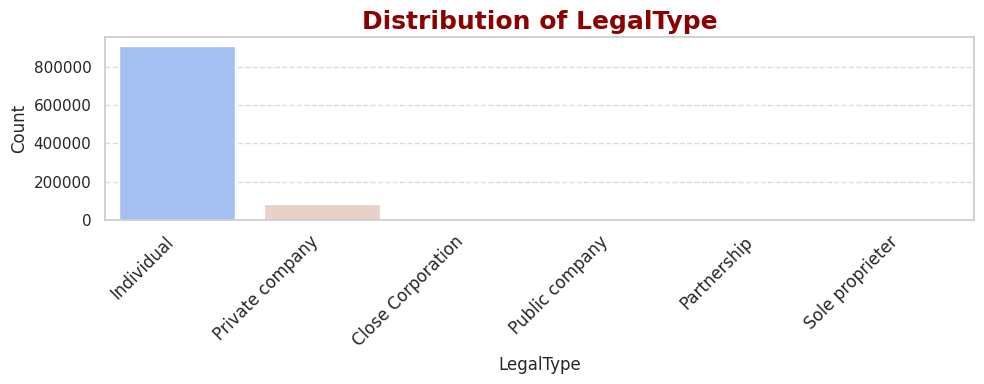

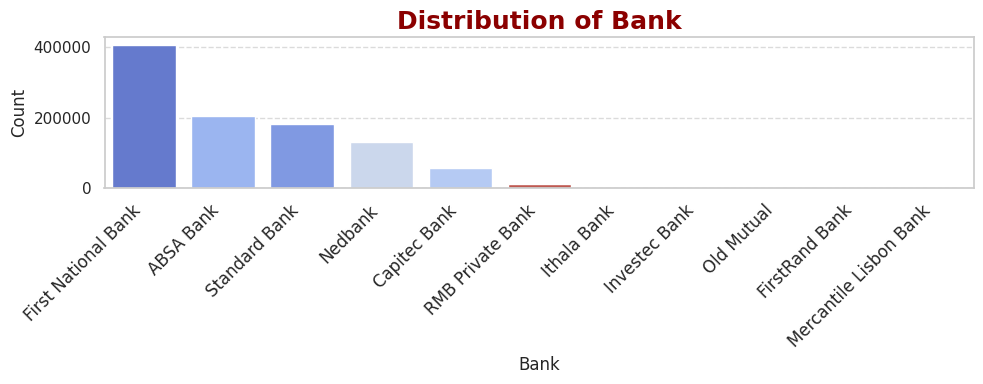

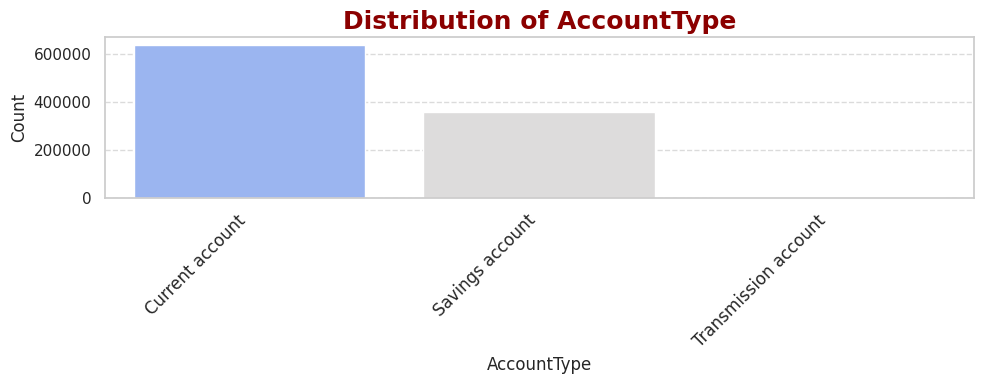

/home/abel/CODE/KiFiya/10-Academy-Week-3/scripts/data_visualization.py:48: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x=col, data=self.data, hue=col, legend=False, palette=colors, order=self.data[col].value_counts().index)


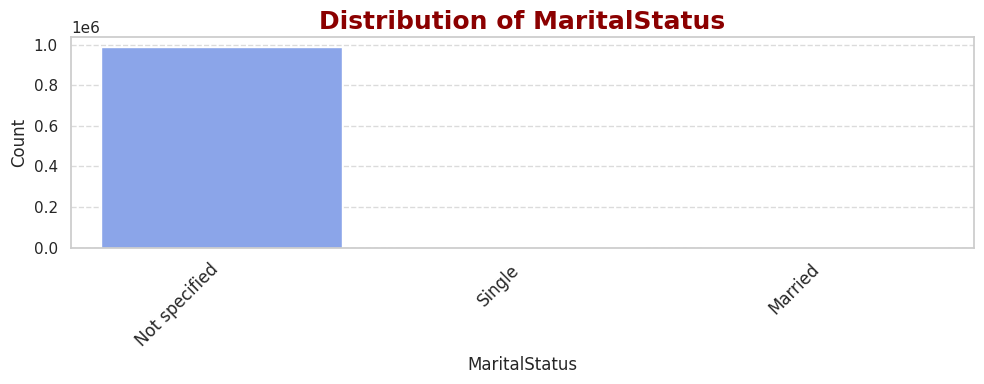

/home/abel/CODE/KiFiya/10-Academy-Week-3/scripts/data_visualization.py:48: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x=col, data=self.data, hue=col, legend=False, palette=colors, order=self.data[col].value_counts().index)


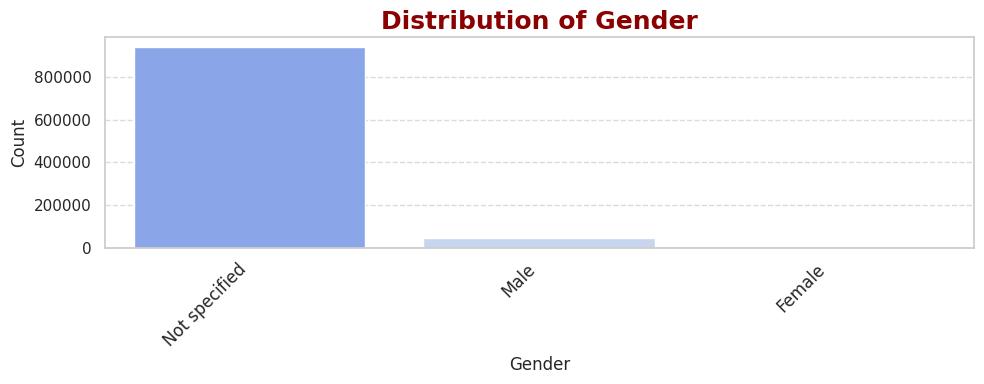

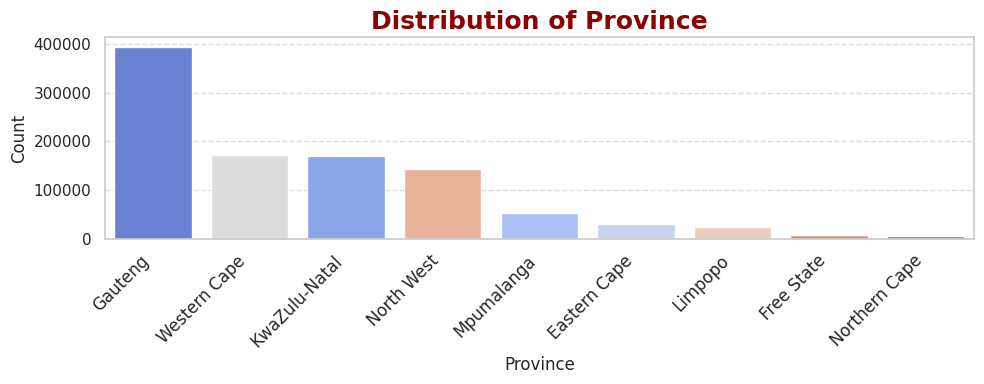

/home/abel/CODE/KiFiya/10-Academy-Week-3/scripts/data_visualization.py:48: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(x=col, data=self.data, hue=col, legend=False, palette=colors, order=self.data[col].value_counts().index)


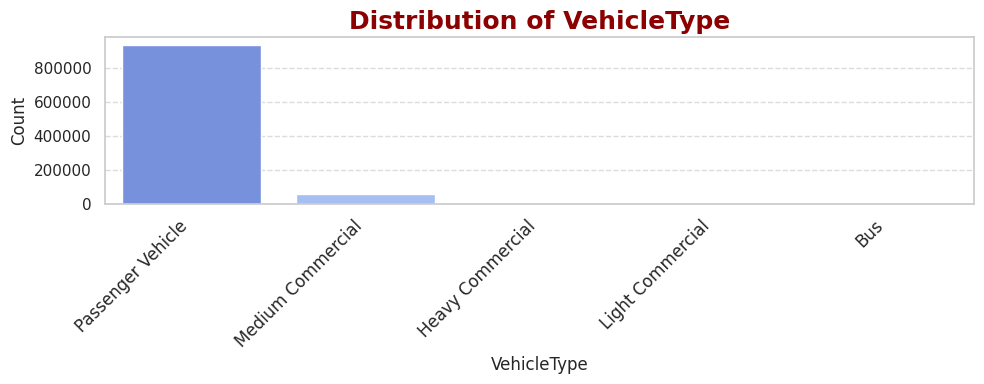

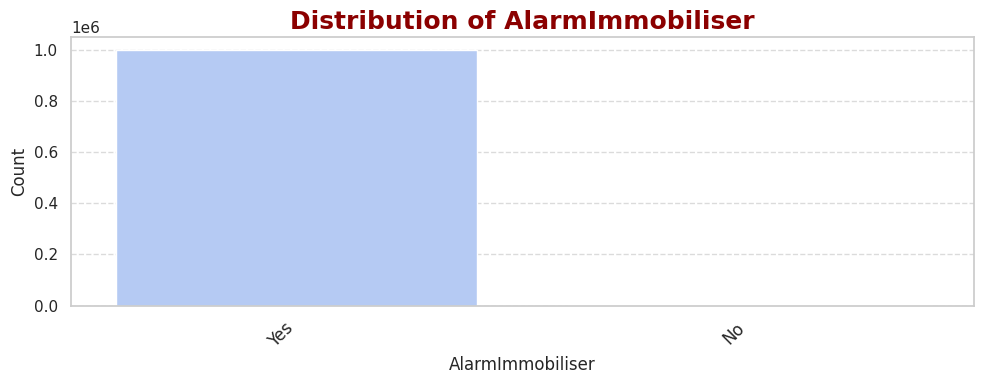

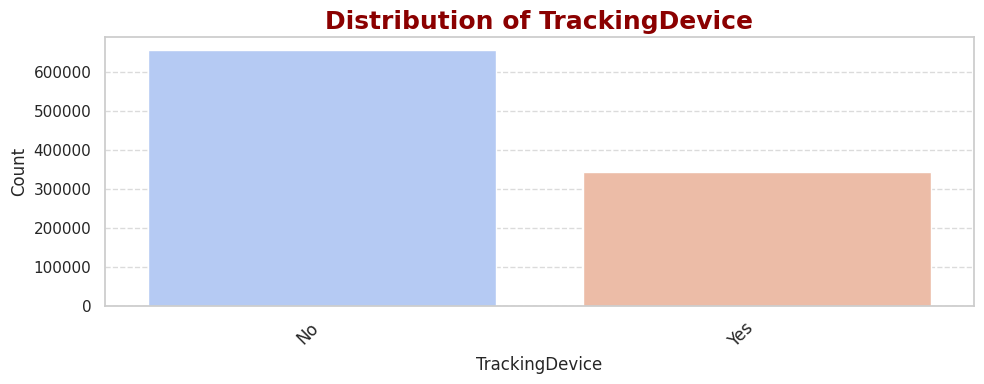

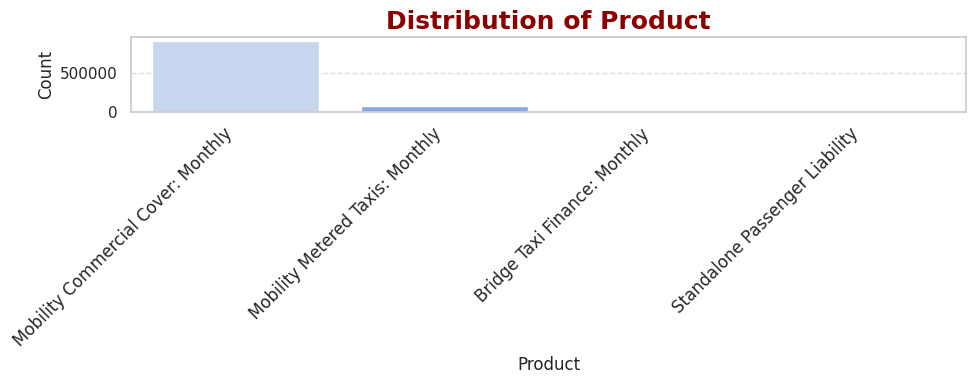

In [13]:
# Import visualizer
from data_visualization import DataVisualizer
# Create instance of the class
vis = DataVisualizer(data)

# Define numerical columns
numerical_cols = [
    'SumInsured', 'CalculatedPremiumPerTerm', 
    'TotalPremium', 'TotalClaims'
]
# Define categorical columns
categorical_cols = [
    'LegalType', 'Bank', 'AccountType', 'MaritalStatus', 
    'Gender', 'Province', 'VehicleType', 
    'AlarmImmobiliser', 'TrackingDevice', 
    'Product'
]

# Plot the plot of both numerical and categorical columns
vis.univariate_analysis(numerical_cols, categorical_cols)

Insights from Univariate Analysis

Numerical Variables:

Sum Insured: The distribution is right-skewed, with most policies having lower sums insured and a few with very high amounts. This indicates a diverse range of policy values, with clusters around specific sums suggesting potential policy tiers.

Calculated Premium Per Term: This variable is also right-skewed, with a peak around a specific amount and variability in premiums. The presence of significantly higher premiums reflects pricing differences among policies.

Total Premium: The distribution is right-skewed, with most policies showing lower total premiums and a peak around zero. High total premiums may be due to refunds or high-risk factors.

Overall, these distributions reveal a wide range of policy values and premiums, with identifiable clusters and outliers that can aid in risk assessment and pricing strategies.

Categorical Variables:

Legal Type: Most policies are issued to individuals, indicating a focus on personal insurance. Private companies and close corporations have fewer policies, with public companies, partnerships, and sole proprietorships being even less common.

Marital Status: A significant portion of data has "Not specified" for marital status, suggesting incomplete information. Single and married individuals are less represented, highlighting potential issues with data collection or privacy concerns.

Province: Gauteng has the highest number of policies, with Western Cape and KwaZulu-Natal showing moderate numbers. Other provinces have fewer policies, indicating a concentration of market presence in specific regions.

Vehicle Type: Passenger vehicles dominate, with fewer policies for commercial vehicle types (medium, heavy, light, and bus). This underscores the company's focus on passenger vehicles.

Gender: A substantial portion of data has "Not specified" for gender, indicating missing information. Male and female categories are present but less common, suggesting potential gaps in data collection or reporting.

Bivariate or Multivariate Analysis:

Correlations and Associations: Explore relationships between the monthly changes TotalPremium and TotalClaims as a function of ZipCode, using scatter plots and correlation matrices.

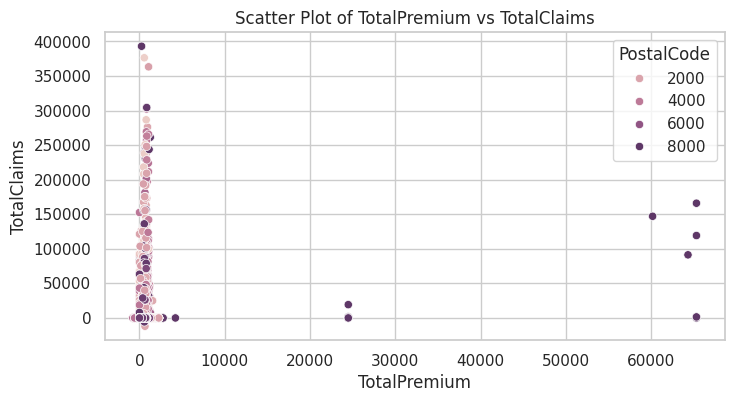

In [14]:
# Define x and y column
x_col = 'TotalPremium'
y_col = 'TotalClaims'
col_hue = 'PostalCode'

# Plot scatter plot
vis.scatter_plot(x_col, y_col, col_hue)

Insights from the Scatter Plot of Total Premium vs. Total Claims

Relationship: There is a weak positive correlation between total premium and total claims, indicating that higher premiums generally correspond to higher claims, though the relationship is not strong.

Clustering: Most data points cluster in the lower ranges for both total premiums and claims, suggesting many policies have minimal claims.

Outliers: A few outliers with very high premiums or claims, or both, could represent policies with unique characteristics that require further investigation.

Postal Code Impact: While color-coding by postal code suggests possible regional variations, no clear pattern emerges from the plot, requiring further analysis to explore regional impacts.

Overall: The scatter plot shows a general but weak relationship between premiums and claims, with common clusters and a few notable outliers.

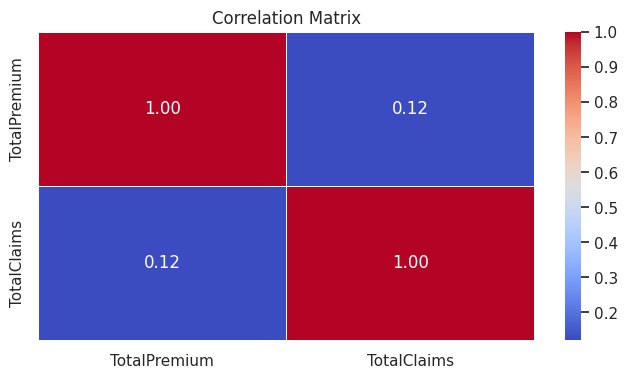

In [15]:
# Compute correlation matrix
cols = ['TotalPremium', 'TotalClaims']

vis.correlation_matrix(cols)

Insights from the Correlation Matrix

Correlation: The correlation between Total Premium and Total Claims is weak at 0.12, indicating a slight tendency for higher premiums to be associated with higher claims, but not strongly.

Interpretation: With a correlation of 0.12, only a small portion of the variation in claims is explained by premiums. Other factors, such as policyholder characteristics or vehicle type, likely have a greater impact on claim amounts.

Conclusion: While there is a weak positive correlation, it suggests that other variables are more significant in influencing claim amounts. Further analysis of these factors is needed for better risk assessment and pricing strategies.

### Data Comparison

Trends Over Geography: Compare the change in insurance cover type, premium, auto make, etc.

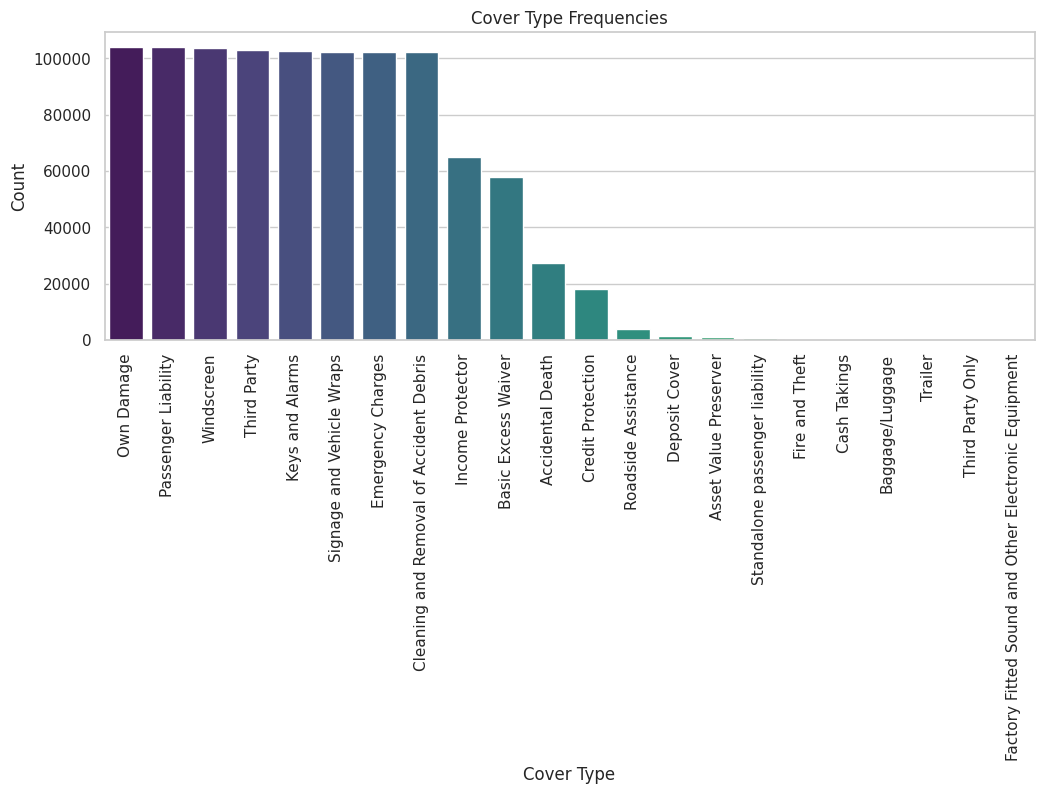

In [16]:
# Cover type frequence distributions accross the regions

cover_type_counts = data['CoverType'].value_counts()

# Create a bar chart with a color palette
plt.figure(figsize=(12, 4))
sns.barplot(x=cover_type_counts.index, y=cover_type_counts, 
            hue=cover_type_counts.index, legend=False,palette='viridis')
plt.title('Cover Type Frequencies')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate labels to the bottom
plt.show()

Cover Type Insights for Optimizing Insurance Offerings

Dominant Cover Types:
The most common cover types are "Own Damage," "Passenger Liability," "Windscreen,", "Third Party", "Keys and Alarms", Signage and Vehicle Wraps", "Emergency Charges", and "Cleaning and Removal of Accidental Debris"

Action: Focus marketing efforts on these core offerings as they drive the majority of customer demand.

Less Frequent Cover Types:
Products like "Income Protector," "Accidental Death," and "Credit Protection" are less commonly chosen.

Action: Market these as optional add-ons or bundle them with core products to increase uptake. 3. Skewed Distribution:

The distribution shows a strong preference for a few cover types, while others are rarely chosen.

Action: Adjust pricing strategies to reflect the popularity of these cover types, offering promotions for less popular ones.

Further Opportunities:
Regional Preferences: Analyze cover type trends by region to customize offerings. Customer Segmentation: Tailor marketing and products to customer segments based on their cover type choices.

Trend Monitoring: Track changes in cover type preferences over time to stay ahead of emerging trends.

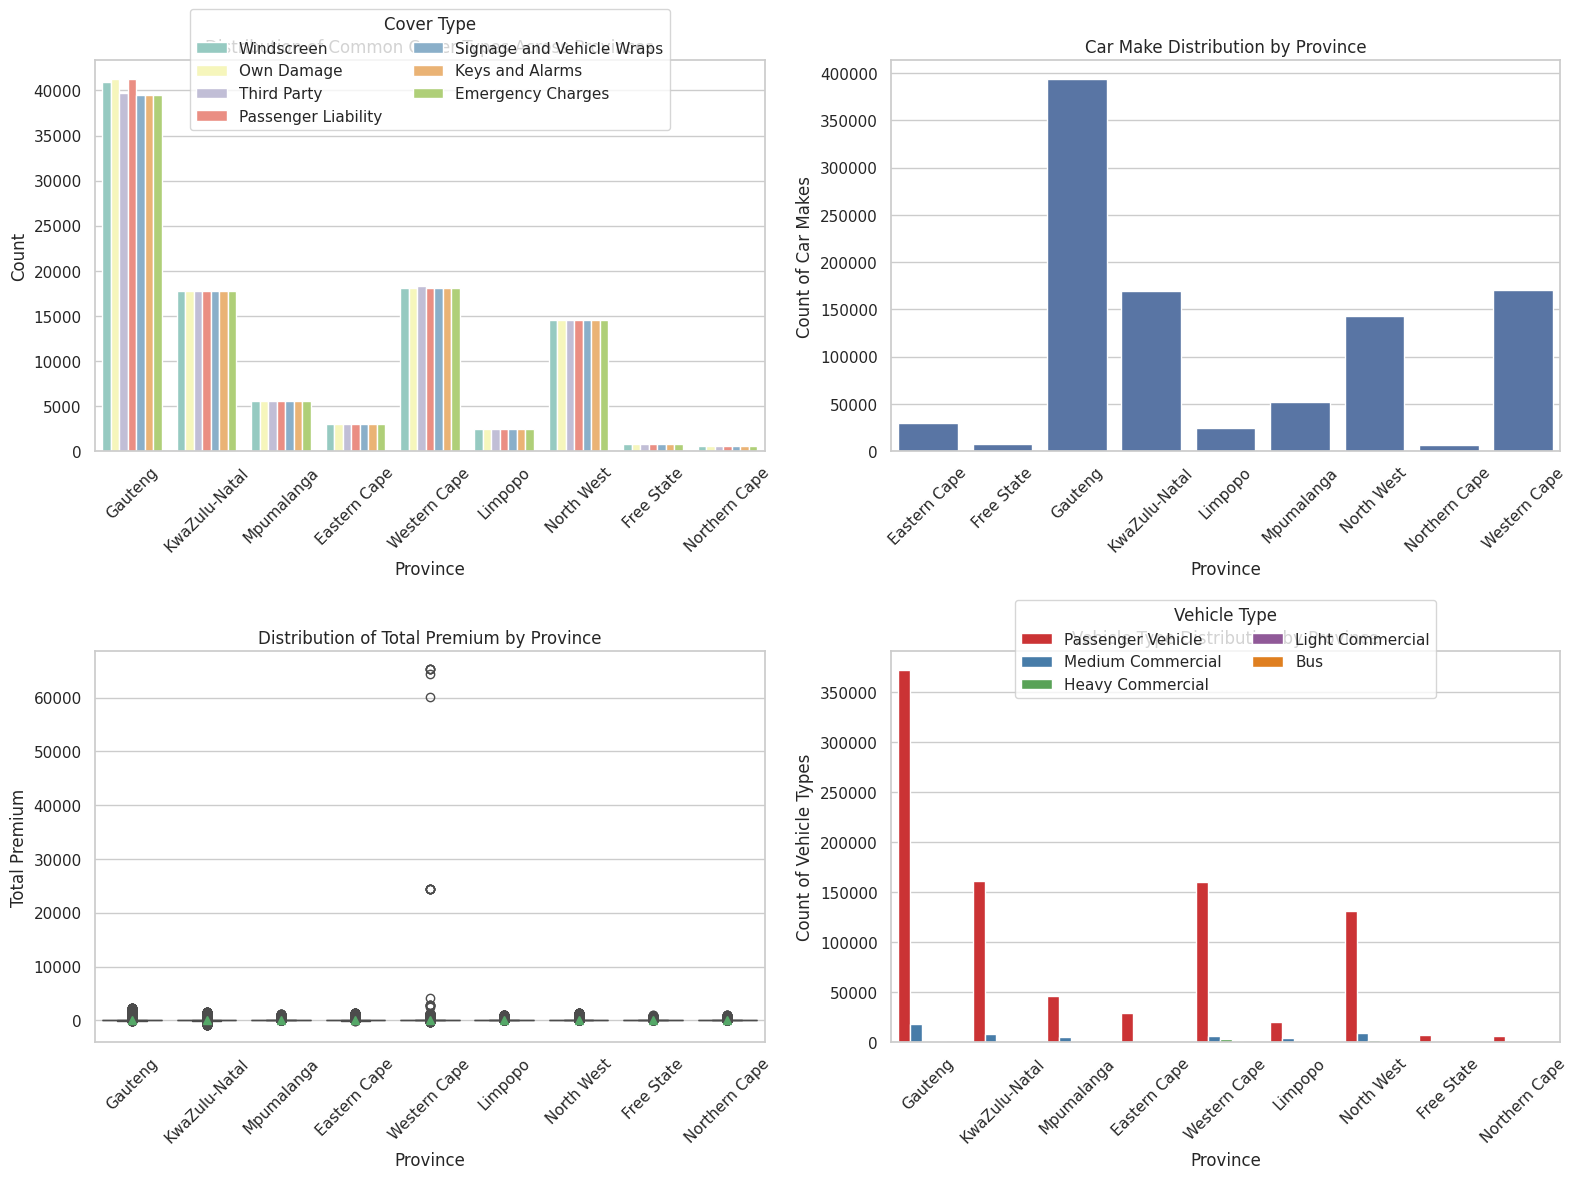

In [17]:
# Define the most c# Define the most common cover types
common_cover_types = [
    'Own Damage', 'Passenger Liability', 'Windscreen', 'Third Party', 
    'Keys and Alarms', 'Signage and Vehicle Wraps', 'Emergency Charges', 
    'Cleaning and Removal of Accidental Debris'
]

# Plot the distribution accross regions
vis.plot_geographical_trends(common_cover_types)
common_cover_types = [
    'Own Damage', 'Passenger Liability', 'Windscreen', 'Third Party', 
    'Keys and Alarms', 'Signage and Vehicle Wraps', 'Emergency Charges', 
    'Cleaning and Removal of Accidental Debris'
]

# Plot the distribution accross regions
vis.plot_geographical_trends(common_cover_types)

Insights from the Visualizations Cover Type Distribution by Province:

Diverse Preferences: There is a wide range of cover types in each province, indicating diverse insurance needs. Dominant Types: "Own Damage" and "Passenger Liability" are consistently popular across most provinces. Regional Variations: Certain cover types, such as "Windscreen" and "Keys and Alarms," have higher frequencies in specific regions. Car Make Distribution by Province:

Dominant Makes: "Gauteng" has a clear preference for certain car makes, while other provinces have a more balanced distribution. Regional Trends: This suggests that car ownership preferences and availability may vary across regions. Distribution of Total Premium by Province:

Wide Range: Total premiums vary significantly across provinces, with some regions having higher average premiums and a wider distribution. Outliers: A few outliers in some provinces indicate policies with exceptionally high or low premiums. Vehicle Type Distribution by Province:

Passenger Vehicles: Passenger vehicles dominate all provinces, but the proportion of commercial vehicles varies. Regional Differences: Certain regions have a higher concentration of commercial vehicles, suggesting different economic activities or transportation needs. Overall Observations:

Regional Diversity: There are distinct regional variations in insurance preferences and needs. Product Tailoring: Insurance companies can tailor their product offerings to meet the specific needs of each province. Pricing Strategies: Pricing strategies should consider regional differences in premium levels and cover type preferences. Further Analysis: Additional factors, such as demographic data and economic indicators, could provide further insights into regional variations.

## Outliers and Box Plot Detection

Outliers are data points that deviate significantly from the majority of the dataset, often indicating variability or errors in data collection. They can distort statistical analyses and affect model performance if not handled properly.

The Box Plot is a powerful tool for visualizing outliers. It displays the distribution of a dataset based on five summary statistics: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. Outliers are identified as points that fall below the lower bound or above the upper bound, calculated using the Interquartile Range (IQR) method:

IQR = Q3 - Q1
Lower Bound = Q1 - 1.5 * IQR
Upper Bound = Q3 + 1.5 * IQR
Points outside this range are potential outliers and can be further examined to determine their impact on the analysis.

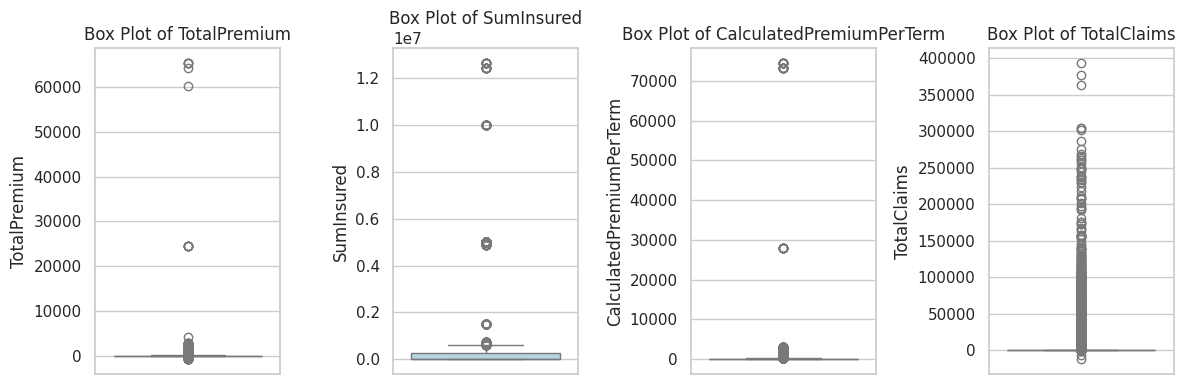

In [18]:
# Define numerical columns to detect outliers
numerical_cols = ['TotalPremium', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalClaims']
# Detect outliers using boxplot
vis.plot_outliers_boxplot(numerical_cols)

Insights and Decisions

1. TotalPremium:

Insight: The box plot shows there are a few outliers on the higher end of the data points.
2. SumInsured:

Insight: The box plot shows a few extreme outliers, significantly higher than the main data range, especially above the 1.2e7 mark.
3. CalculatedPremiumPerTerm:

Insight: The box plot highlights a few significant outliers, especially around the 70,000 mark, far removed from the core data.
4. TotalClaims:

Insight: Several extreme outliers, particularly those above 100,000, are present, indicating a high variance that could mislead future analysis. The median is around 100,000. There are a few outliers on the higher end.

In [ ]:
# Capping outliers of the numerical variables

df_capped = vis.cap_all_outliers(numerical_cols)

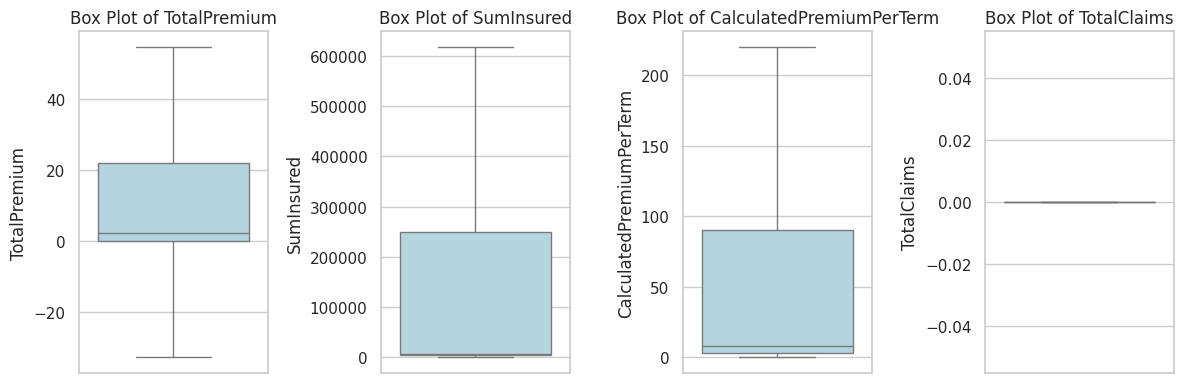

In [20]:
# Check outliers after the outliers were capped
vis1 = DataVisualizer(df_capped)
vis1.plot_outliers_boxplot(numerical_cols)

Capping outliers has resulted in more balanced distributions, which can prevent skewness and help with more accurate analyses. The capping approach preserves the integrity of the data while addressing the extreme values without fully removing them.

In [21]:
# Save the cleaned data to csv for future analysis
df_capped.to_csv('../data/cleaned_data.csv')